In [11]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [12]:

# Предварительная обработка данных
#Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше.
#features = pandas.read_csv('./features.csv', index_col='match_id')

#Загружаем тренировочные данные и тестовые
train = pd.read_csv('features.csv', index_col='match_id')
#test = pd.read_csv('features_test.csv', index_col='match_id')

# Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# Разделяем  на признаки 
X = train
# и yf целевую переменную
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [13]:
#Замените пропуски на нули с помощью функции fillna(). 
#На самом деле этот способ является предпочтительным для логистической регрессии, 
#поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. 

# Заменяем пропуски на 0
X = X.fillna(0)


In [15]:
#Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), 
#не забудьте перемешать при этом выборку (shuffle=True), 
#поскольку данные в таблице отсортированы по времени, 
#и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества.

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)


In [19]:
 
scores = []
nums = [10, 20, 30, 50, 100, 200]
for k in nums:
    print '#', str(k)
    model = GradientBoostingClassifier(n_estimators=k, random_state=42)
    #Измерение времени работы кода
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print 'Time elapsed:', datetime.datetime.now() - start_time
    print model_scores
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:24.826000
[ 0.66383799  0.66635457  0.66360048  0.66529818  0.66516222]
# 20
Time elapsed: 0:00:41.803000
[ 0.68083889  0.68272733  0.67969876  0.6834932   0.6855512 ]
# 30
Time elapsed: 0:00:59.832000
[ 0.68892093  0.68934663  0.68712298  0.69180598  0.69283583]
# 50
Time elapsed: 0:01:34.571000
[ 0.69627399  0.69747879  0.69470891  0.69921915  0.69979097]
# 100
Time elapsed: 0:03:05.749000
[ 0.70515496  0.706077    0.70429951  0.7074682   0.70811523]
# 200
Time elapsed: 0:05:51.218000
[ 0.71214175  0.71304181  0.71259725  0.71556107  0.71510233]


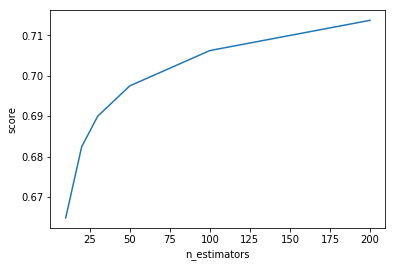

In [20]:
#Выведем результаты на график
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()


Кросс-валидация для градиентного бустинга с 30 деревьями заняла 59:47. 
Метрика качества AUC-ROC = 0.69.
Увеличение количества деревьев улучшает показатель метрики AUC-ROC => 0.71. 
Для достижения оптимального качества имеет смысл использовать более 30 деревьев. 

Для ускорения обучения можно использовать не всю выборку, а только половину объектов. 
Если уменьшить глубину деревьев (max_depth) также можно достигнуть ускорения обучения.
